In [29]:
import pandas as pd

# Initialize variables to store data
blocks = []
genes = []
conditions = []
data = []

# Read the file line by line
with open('qubic/filtered_features_index.tsv.blocks', 'r') as file:
    current_block = None
    current_genes = []
    current_conditions = []
    current_data = []

    for line in file:
        line = line.strip()

        # Skip comment lines
        if line.startswith('#'):
            continue

        # Check for a new block
        if line.startswith('BC'):
            if current_block is not None:
                # Save the previous block's data
                blocks.append(current_block)
                genes.append(current_genes)
                conditions.append(current_conditions)
                data.append(current_data)

            # Start a new block
            current_block = line
            current_genes = []
            current_conditions = []
            current_data = []

        # Extract genes
        elif line.startswith('Genes'):
            current_genes = line.split(':')[1].strip().split()

        # Extract conditions
        elif line.startswith('Conds'):
            current_conditions = line.split(':')[1].strip().split()

        # Extract data (numeric values)
        elif line and not line.startswith('BC'):
            current_data.append(line.split())

    # Save the last block's data
    if current_block is not None:
        blocks.append(current_block)
        genes.append(current_genes)
        conditions.append(current_conditions)
        data.append(current_data)

# Print the extracted data for inspection
print("Blocks:", blocks)
print("Genes:", genes)
print("Conditions:", conditions)
print("Data:", data)

Blocks: ['BC000\tS=460\tEnrichment:1.94\tRow=20\tCol=23\tCore_Row=20\tCore_Col=23', 'BC001\tS=480\tEnrichment:1.93\tRow=15\tCol=32\tCore_Row=15\tCore_Col=32', 'BC002\tS=435\tEnrichment:1.91\tRow=15\tCol=29\tCore_Row=15\tCore_Col=29', 'BC003\tS=270\tEnrichment:1.97\tRow=15\tCol=18\tCore_Row=15\tCore_Col=18', 'BC004\tS=434\tEnrichment:1.92\tRow=14\tCol=31\tCore_Row=14\tCore_Col=31', 'BC005\tS=546\tEnrichment:1.94\tRow=13\tCol=42\tCore_Row=13\tCore_Col=42', 'BC006\tS=442\tEnrichment:1.91\tRow=13\tCol=34\tCore_Row=13\tCore_Col=34', 'BC007\tS=221\tEnrichment:2.01\tRow=13\tCol=17\tCore_Row=13\tCore_Col=17', 'BC008\tS=288\tEnrichment:1.74\tRow=24\tCol=12\tCore_Row=24\tCore_Col=12', 'BC009\tS=540\tEnrichment:1.91\tRow=12\tCol=45\tCore_Row=12\tCore_Col=45', 'BC010\tS=288\tEnrichment:1.92\tRow=12\tCol=24\tCore_Row=12\tCore_Col=24', 'BC011\tS=240\tEnrichment:1.98\tRow=12\tCol=20\tCore_Row=12\tCore_Col=20', 'BC012\tS=516\tEnrichment:1.90\tRow=12\tCol=43\tCore_Row=12\tCore_Col=43', 'BC013\tS=252\tE

Truncating or padding the data to match the number of conditions.


d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


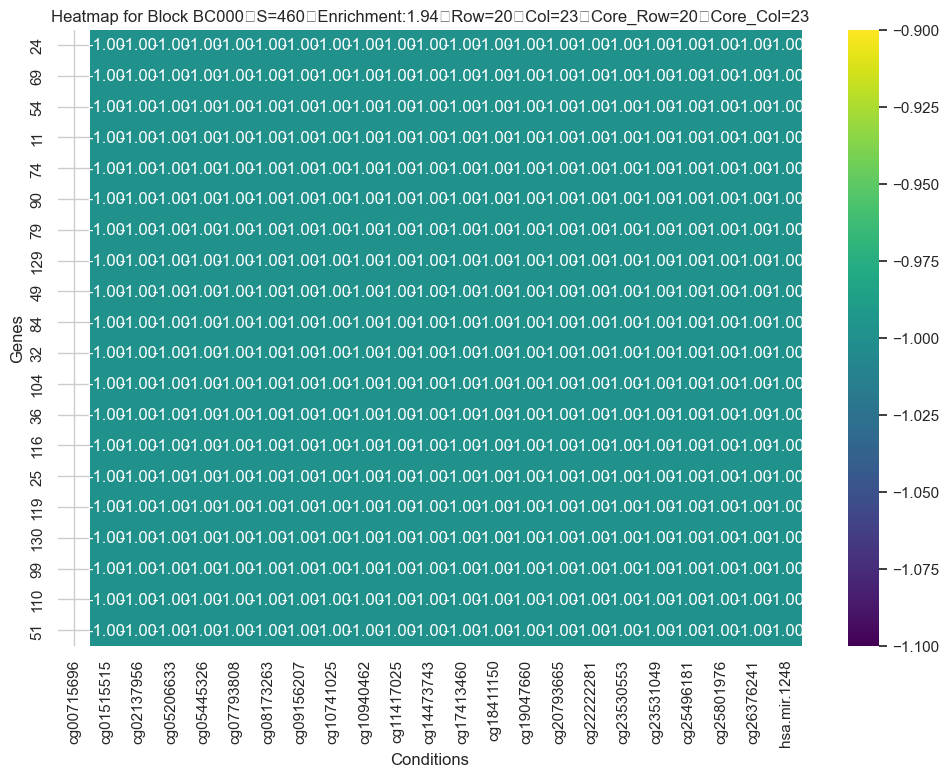

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a heatmap for the first block
block_index = 0  # Change this to visualize a different block

# Convert the data to a DataFrame
block_data = pd.DataFrame(data[block_index])

# Check the number of columns in the data
num_columns = len(block_data.columns)

# Check the number of conditions
num_conditions = len(conditions[block_index])

# If there's a mismatch, fix it
if num_columns != num_conditions:
    print(f"Warning: Mismatch in columns. Data has {num_columns} columns, but conditions has {num_conditions}.")
    print("Truncating or padding the data to match the number of conditions.")

    # Truncate or pad the data to match the number of conditions
    if num_columns > num_conditions:
        block_data = block_data.iloc[:, :num_conditions]  # Truncate extra columns
    else:
        # Pad missing columns with NaN
        for _ in range(num_conditions - num_columns):
            block_data[num_columns + _] = None

# Set the column names to the conditions
block_data.columns = conditions[block_index]

# Set the row names to the genes
block_data.index = genes[block_index]

# Convert the DataFrame to numeric (if necessary)
block_data = block_data.apply(pd.to_numeric, errors='coerce')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(block_data, cmap='viridis', annot=True, fmt=".2f")
plt.title(f'Heatmap for Block {blocks[block_index]}')
plt.xlabel('Conditions')
plt.ylabel('Genes')
plt.show()

In [31]:
# Print dimensions of each block
for i, block in enumerate(blocks):
    num_genes = len(genes[i])
    num_conditions = len(conditions[i])
    print(f"Block {block}: {num_genes} genes x {num_conditions} conditions")

Block BC000	S=460	Enrichment:1.94	Row=20	Col=23	Core_Row=20	Core_Col=23: 20 genes x 23 conditions
Block BC001	S=480	Enrichment:1.93	Row=15	Col=32	Core_Row=15	Core_Col=32: 15 genes x 32 conditions
Block BC002	S=435	Enrichment:1.91	Row=15	Col=29	Core_Row=15	Core_Col=29: 15 genes x 29 conditions
Block BC003	S=270	Enrichment:1.97	Row=15	Col=18	Core_Row=15	Core_Col=18: 15 genes x 18 conditions
Block BC004	S=434	Enrichment:1.92	Row=14	Col=31	Core_Row=14	Core_Col=31: 14 genes x 31 conditions
Block BC005	S=546	Enrichment:1.94	Row=13	Col=42	Core_Row=13	Core_Col=42: 13 genes x 42 conditions
Block BC006	S=442	Enrichment:1.91	Row=13	Col=34	Core_Row=13	Core_Col=34: 13 genes x 34 conditions
Block BC007	S=221	Enrichment:2.01	Row=13	Col=17	Core_Row=13	Core_Col=17: 13 genes x 17 conditions
Block BC008	S=288	Enrichment:1.74	Row=24	Col=12	Core_Row=24	Core_Col=12: 24 genes x 12 conditions
Block BC009	S=540	Enrichment:1.91	Row=12	Col=45	Core_Row=12	Core_Col=45: 12 genes x 45 conditions
Block BC010	S=288	En

In [45]:
multi_omic_df = pd.read_csv('filtered_features_anova.tsv', sep="\t", on_bad_lines="skip")
# Extract the first row and assign it as column names
#multi_omic_df.columns = multi_omic_df.iloc[0]
#multi_omic_df = multi_omic_df[1:]
# Reset index
multi_omic_df.reset_index(drop=True, inplace=True)
print(multi_omic_df.head())

# Clean column names in the multi-omic DataFrame
multi_omic_df.columns = [col.strip() for col in multi_omic_df.columns]

# Clean gene and condition names in the blocks
genes = [[gene.strip() for gene in sublist] for sublist in genes]
conditions = [[cond.strip() for cond in sublist] for sublist in conditions]

# Initialize a list to store the DataFrames for each block
block_dataframes = []

# Iterate through each block
for i in range(len(blocks)):
    # Extract genes and conditions for the current block
    current_genes = [int(gene) for gene in genes[i] if int(gene) in multi_omic_df.index]
    current_conditions = [cond for cond in conditions[i] if cond in multi_omic_df.columns]
    print(current_genes)

    # Include the 'Death' column in the conditions
    if 'Death' in multi_omic_df.columns and 'Death' not in current_conditions:
        current_conditions.append('Death')

    # Skip the block if no valid genes or conditions are found
    if not current_genes or not current_conditions:
        print(f"Skipping block {i} due to missing genes or conditions.")
        continue

    filtered_column = multi_omic_df[current_conditions]
    filtered_df = filtered_column.loc[current_genes]

    # Append the filtered DataFrame to the list
    block_dataframes.append(filtered_df)

   X..100130426  X..391343  ABCA17P.650655  ACTL9.284382  ACY3.91703  \
0     -0.481788   2.915469        0.488841     -0.399636   -0.288242   
1     -0.481788  -0.407763       -1.891932     -0.399636    0.302379   
2     -0.481788  -0.407763        0.628157     -0.399636    0.761346   
3     -0.481788  -0.407763        0.700952     -0.399636    0.119867   
4     -0.481788  -0.407763        0.493521     -0.399636    0.708159   

   ADAMTS3.9508  AFAP1L1.134265   AGT.183  ALDH1A2.8854  ANGPTL3.27329  ...  \
0      0.344308        0.748717  0.747830      0.980916       0.231374  ...   
1     -2.209718        0.018986 -1.759513      1.112930      -3.023792  ...   
2      0.221723        0.040994  0.218279     -0.950297       0.386257  ...   
3      0.382081        0.072354  0.214471     -0.950297       0.584656  ...   
4      0.083007       -0.044447  0.166009     -0.950297       0.135580  ...   

   hsa.mir.600  hsa.mir.656  hsa.mir.660  hsa.mir.665  hsa.mir.770  \
0    -0.481671    -0.4

In [46]:
# Print the first few rows of each DataFrame
for i, df in enumerate(block_dataframes):
    print(f"Block {i}:")
    print(df.head())
    print("\n")
    df.to_csv(f"qubic/blocks/Block {i}.csv")

Block 0:
    cg00715696  cg01515515  cg02137956  cg05206633  cg05445326  cg07793808  \
24    0.185876   -1.269568   -1.016409   -1.069062    0.129975    0.736492   
69    0.308138   -1.380611   -1.093566   -0.911416    0.678798   -0.989227   
54    0.338137   -1.291941   -1.081857   -1.022546   -0.493158   -0.571720   
11   -0.860111   -1.305750   -1.221979    0.292566    0.753872   -0.636795   
74   -0.552951   -1.289200   -1.285550   -0.326682    0.669231   -0.331147   

    cg08173263  cg09156207  cg10741025  cg10940462  ...  cg19047660  \
24   -0.709517   -1.809951    0.340001    1.042801  ...   -0.731941   
69   -0.767837   -2.106895   -1.161439   -0.924919  ...   -0.762747   
54   -0.803260   -1.967681   -1.189924   -0.874262  ...   -0.727016   
11   -0.833295    0.294038   -1.265214   -0.914620  ...   -0.789748   
74   -0.738020    0.769057   -0.721897   -0.772268  ...   -0.769493   

    cg20793665  cg22222281  cg23530553  cg23531049  cg25496181  cg25801976  \
24   -0.353933   

Loading ./qubic/blocks/Block 0.csv...
Loading ./qubic/blocks/Block 1.csv...
Loading ./qubic/blocks/Block 2.csv...
Loading ./qubic/blocks/Block 3.csv...
Loading ./qubic/blocks/Block 4.csv...
Loading ./qubic/blocks/Block 5.csv...
Loading ./qubic/blocks/Block 6.csv...
Loading ./qubic/blocks/Block 7.csv...
Loading ./qubic/blocks/Block 8.csv...
Loading ./qubic/blocks/Block 9.csv...
Loading ./qubic/blocks/Block 10.csv...
Loading ./qubic/blocks/Block 11.csv...
Loading ./qubic/blocks/Block 12.csv...
Loading ./qubic/blocks/Block 13.csv...
Loading ./qubic/blocks/Block 14.csv...
Loading ./qubic/blocks/Block 15.csv...
Loading ./qubic/blocks/Block 16.csv...
Loading ./qubic/blocks/Block 17.csv...
Loading ./qubic/blocks/Block 18.csv...
Loading ./qubic/blocks/Block 19.csv...
Loading ./qubic/blocks/Block 20.csv...
Loading ./qubic/blocks/Block 21.csv...
Loading ./qubic/blocks/Block 22.csv...
Loading ./qubic/blocks/Block 23.csv...
Loading ./qubic/blocks/Block 24.csv...
Loading ./qubic/blocks/Block 25.csv

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BioGptTokenizer'. 
The class this function is called from is 'GPT2Tokenizer'.



Generating embeddings using biogpt...


You are using a model of type biogpt to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.
Some weights of GPT2Model were not initialized from the model checkpoint at microsoft/biogpt and are newly initialized: ['h.0.attn.c_attn.bias', 'h.0.attn.c_attn.weight', 'h.0.attn.c_proj.bias', 'h.0.attn.c_proj.weight', 'h.0.ln_1.bias', 'h.0.ln_1.weight', 'h.0.ln_2.bias', 'h.0.ln_2.weight', 'h.0.mlp.c_fc.bias', 'h.0.mlp.c_fc.weight', 'h.0.mlp.c_proj.bias', 'h.0.mlp.c_proj.weight', 'h.1.attn.c_attn.bias', 'h.1.attn.c_attn.weight', 'h.1.attn.c_proj.bias', 'h.1.attn.c_proj.weight', 'h.1.ln_1.bias', 'h.1.ln_1.weight', 'h.1.ln_2.bias', 'h.1.ln_2.weight', 'h.1.mlp.c_fc.bias', 'h.1.mlp.c_fc.weight', 'h.1.mlp.c_proj.bias', 'h.1.mlp.c_proj.weight', 'h.10.attn.c_attn.bias', 'h.10.attn.c_attn.weight', 'h.10.attn.c_proj.bias', 'h.10.attn.c_proj.weight', 'h.10.ln_1.bias', 'h.10.ln_1.weight', 'h.10.ln_2.bias', 'h.10.ln_2.weight', 'h.10.mlp.c_fc.bias'

❌ Erreur lors de la tokenisation à l'index 0: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌

d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


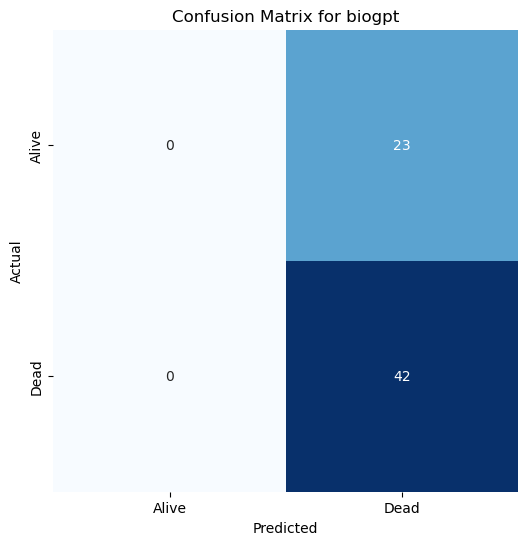


Generating embeddings using biobert...
Embedding generation time: 202.54 seconds

Results for biobert:
Training Time: 1.78 seconds
Accuracy: 0.8
ROC-AUC Score: 0.8540372670807453
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.57      0.67        23
         1.0       0.80      0.93      0.86        42

    accuracy                           0.80        65
   macro avg       0.80      0.75      0.76        65
weighted avg       0.80      0.80      0.79        65



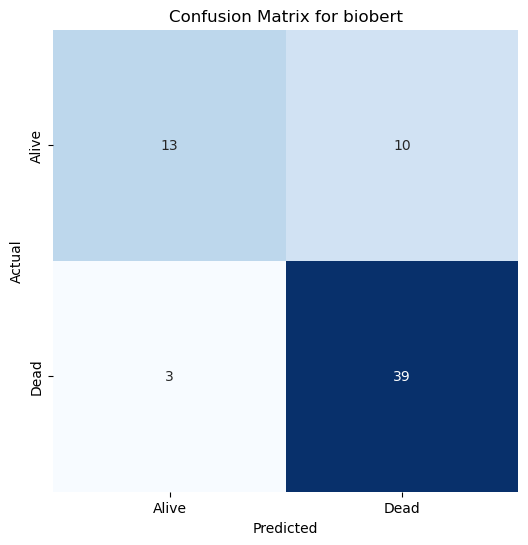


Generating embeddings using scbert...
Embedding generation time: 207.68 seconds

Results for scbert:
Training Time: 1.98 seconds
Accuracy: 0.7846153846153846
ROC-AUC Score: 0.84472049689441
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.61      0.67        23
         1.0       0.80      0.88      0.84        42

    accuracy                           0.78        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.78      0.78      0.78        65



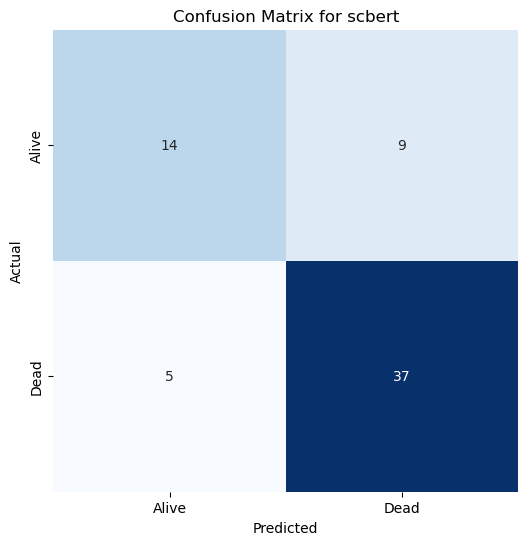


Comparison of Models:
     Model  Embedding Time (s)  Training Time (s)  Accuracy   ROC-AUC
0   biogpt            8.901112           0.046050  0.646154  0.500000
1  biobert          202.544367           1.778653  0.800000  0.854037
2   scbert          207.684438           1.981996  0.784615  0.844720


In [26]:
import pandas as pd
import os
import numpy as np
import torch
from transformers import BertTokenizer, BertModel, GPT2Tokenizer, GPT2Model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Step 1: Load and Combine All Blocks
def load_and_combine_blocks(block_range, base_path=""):
    blocks = []
    for i in block_range:
        file_path = os.path.join(base_path, f"Block {i}.csv")
        if os.path.exists(file_path):
            print(f"Loading {file_path}...")
            block = pd.read_csv(file_path)
            blocks.append(block)
        else:
            print(f"File not found: {file_path}")
    
    if not blocks:
        raise ValueError("No files found to concatenate. Check the directory and file names.")
    
    combined_data = pd.concat(blocks, ignore_index=True)
    return combined_data

# Load blocks 0 to 48
block_range = range(49)  
try:
    combined_data = load_and_combine_blocks(block_range, "./qubic/blocks/")
except ValueError as e:
    print(e)
    exit()

# Step 2: Preprocess the Data
print("Missing values in 'Death' column:", combined_data["Death"].isnull().sum())

# Remove rows with missing target values
combined_data = combined_data.dropna(subset=["Death"])

# Separate features and target
X = combined_data.drop(columns=["Death"])
y = combined_data["Death"]

# Step 3: Convert Gene Data to Text
def convert_to_text(row, genes):
    return ", ".join([f"{gene}: {row[gene]}" for gene in genes])

genes = X.columns
patient_texts = X.apply(lambda row: convert_to_text(row, genes), axis=1)

# Gérer les cas où les textes sont manquants
patient_texts = patient_texts.fillna("")
patient_texts = patient_texts.astype(str)  # Conversion en string

# Step 4: Generate Embeddings Using Different Models
def generate_embeddings(texts, model_name="biobert"):
    if model_name == "biobert":
        tokenizer = BertTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
        model = BertModel.from_pretrained("dmis-lab/biobert-v1.1")
    elif model_name == "scbert":
        tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
        model = BertModel.from_pretrained("allenai/scibert_scivocab_uncased")
    elif model_name == "biogpt":
        tokenizer = GPT2Tokenizer.from_pretrained("microsoft/biogpt")
        model = GPT2Model.from_pretrained("microsoft/biogpt")
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token
    else:
        raise ValueError("Unsupported model name. Choose from 'biobert', 'scbert', or 'biogpt'.")

    embeddings = []
    for idx, text in enumerate(texts):
        if not isinstance(text, str) or text.strip() == "":
            print(f"⚠️ Skipping invalid text at index {idx}")
            embeddings.append(np.zeros(768))  # Placeholder vector
            continue
        
        try:
            inputs = tokenizer(
                str(text),  # Forcer la conversion en string
                return_tensors="pt",
                truncation=True,
                padding=True,  # Assure un padding uniforme
                max_length=512,
            )

            with torch.no_grad():
                outputs = model(**inputs)

            embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            embeddings.append(embedding)

        except Exception as e:
            print(f"❌ Erreur lors de la tokenisation à l'index {idx}: {e}")
            embeddings.append(np.zeros(768))  # Placeholder pour éviter de casser le pipeline

    return np.array(embeddings)

# Step 5: Train and Evaluate Models
def train_and_evaluate(model_name, embeddings, y):
    X_train, X_test, y_train, y_test = train_test_split(
        embeddings, y, test_size=0.1, random_state=42, stratify=y
    )

    xgb_model = XGBClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1,
    )

    start_time = time.time()
    xgb_model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = xgb_model.predict(X_test)
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nResults for {model_name}:")
    print(f"Training Time: {training_time:.2f} seconds")
    print("Accuracy:", accuracy)
    print("ROC-AUC Score:", roc_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    return accuracy, roc_auc, training_time

# Step 6: Compare Models
models = ["biogpt", "biobert", "scbert"]
results = []

for model_name in models:
    print(f"\nGenerating embeddings using {model_name}...")
    start_time = time.time()
    embeddings = generate_embeddings(patient_texts, model_name=model_name)
    embedding_time = time.time() - start_time
    print(f"Embedding generation time: {embedding_time:.2f} seconds")

    accuracy, roc_auc, training_time = train_and_evaluate(model_name, embeddings, y)

    results.append({
        "Model": model_name,
        "Embedding Time (s)": embedding_time,
        "Training Time (s)": training_time,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
    })

# Step 7: Compare Results
results_df = pd.DataFrame(results)
print("\nComparison of Models:")
print(results_df)
